In [33]:
# 加载数据并初步处理

In [34]:
# import pandas as pd
#
# # 定义一个函数用于选择要跳过的行
# def skip_rows(n):
#     # 创建一个生成器，返回需要保留的行号（从0开始计数）
#     def row_filter(x):
#         return x % n != 0
#     return row_filter
#
# # 文件路径
# file_path = 'database.csv'  # 请根据你的实际情况更改文件路径
#
# # 使用skiprows参数和定义的函数来读取文件
# df = pd.read_csv(file_path, skiprows=skip_rows(10))  # 每10行取一条数据


In [35]:
import pandas as pd

# 读取数据文件（假设是CSV格式）
df = pd.read_csv('1.csv')

# 查看数据的前几行
df.head()


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [36]:
#  热力图：犯罪类型和种族/年龄的关系

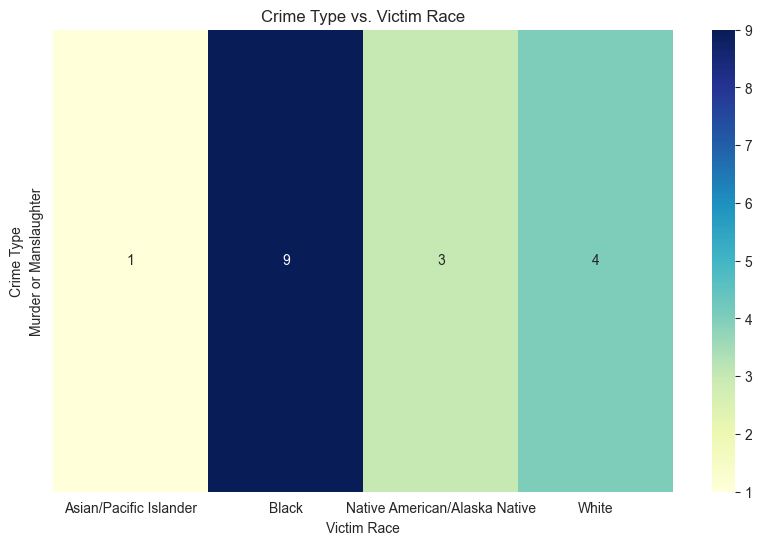

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算不同犯罪类型和种族的交叉表
crime_race_ct = pd.crosstab(df['Crime Type'], df['Victim Race'])

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(crime_race_ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Crime Type vs. Victim Race")
plt.xlabel("Victim Race")
plt.ylabel("Crime Type")
plt.show()


In [38]:
# 3. 分析犯罪与种族的相关性

In [39]:
from scipy.stats import chi2_contingency

# 计算卡方检验
contingency_table = pd.crosstab(df['Crime Type'], df['Victim Race'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("犯罪和种族之间有很大的关系.")
else:
    print("犯罪和种族之间无关.")


Chi-squared: 0.0
P-value: 1.0
犯罪类型和受害者种族之间无关.


In [40]:
#  分类统计：性别和武器类型的关系

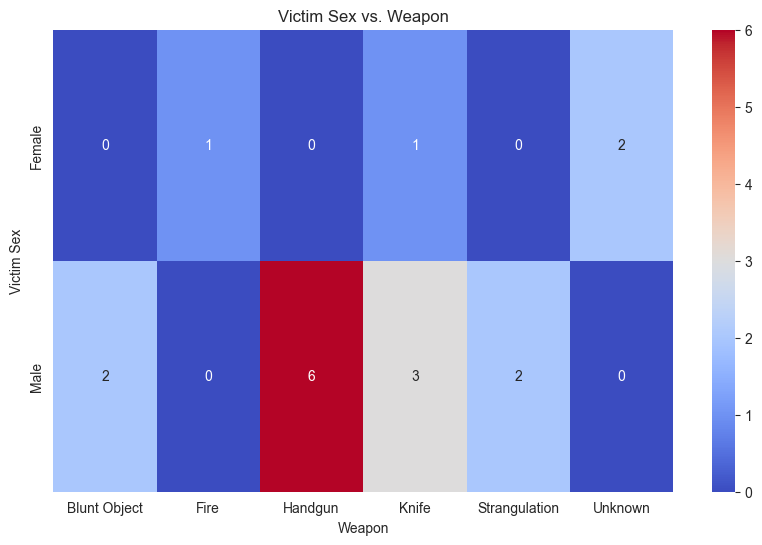

In [41]:
# 按性别和武器类型统计
gender_weapon_ct = pd.crosstab(df['Victim Sex'], df['Weapon'])

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(gender_weapon_ct, annot=True, cmap="coolwarm", fmt="d")
plt.title("Victim Sex vs. Weapon")
plt.xlabel("Weapon")
plt.ylabel("Victim Sex")
plt.show()
